In [1]:
# brute force menggunakan 3 nested loop
def max_subarray_sum_bf(arr, n):
    maks_subarray_sum = 0 
    for i in range(n): 
        for j in range(i, n):
            subarray_sum = 0 
            for k in range(i, j+1):
                subarray_sum += arr[k] 
            
            if subarray_sum > maks_subarray_sum:
                maks_subarray_sum = subarray_sum

    return maks_subarray_sum

In [2]:
# kadane's algorithm menggunakan 1 loop
def max_subarray_sum_kadane(arr, n):
    maks_subarray_sum = arr[0]
    maks_subarray_sum_local = arr[0]
    for i in range(1, n):
        maks_subarray_sum_local = max(maks_subarray_sum_local + arr[i], arr[i])
        
        if maks_subarray_sum < maks_subarray_sum_local:
            maks_subarray_sum = maks_subarray_sum_local
        
    return maks_subarray_sum

In [3]:
import timeit
import pandas as pd
import seaborn as sns
from numpy import random
import matplotlib.pyplot as plt

m_time = []
bf_time = []
dp_time = []
n_size = [10, 100, 500, 1000]


def calculate(start): 
    stop = timeit.default_timer()
    executiobf_time = stop - start
    return round(executiobf_time, 6)


def count_time(arr, n, method, name):
    start = timeit.default_timer()
    ans = method(arr, n)
    time = calculate(start)
    if method == max_subarray_sum_bf:
        bf_time.append(time)
    elif method == max_subarray_sum_kadane:
        dp_time.append(time)
    m_time.append([name, n, ans, time])

# size array = 10
arr = random.randint(-999, 999, size=10)
count_time(arr, len(arr), max_subarray_sum_bf, 'brute force')
count_time(arr, len(arr), max_subarray_sum_kadane, 'kadane\'s')

# size array = 100
arr = random.randint(-999, 999, size=100)
count_time(arr, len(arr), max_subarray_sum_bf, 'brute force')
count_time(arr, len(arr), max_subarray_sum_kadane, 'kadane\'s')

# size array = 500
arr = random.randint(-999, 999, size=500)
count_time(arr, len(arr), max_subarray_sum_bf, 'brute force')
count_time(arr, len(arr), max_subarray_sum_kadane, 'kadane\'s')

# size array = 1000
arr = random.randint(-999, 999, size=1000)
count_time(arr, len(arr), max_subarray_sum_bf, 'brute force')
count_time(arr, len(arr), max_subarray_sum_kadane, 'kadane\'s')

m_time = pd.DataFrame(m_time, columns = ['Method', 'n', 'Answer', 'Time'])

print()
print(m_time, end="\n")
m_time.groupby(['Method'])['Time'].sum().reset_index()


        Method     n  Answer       Time
0  brute force    10    2480   0.000081
1     kadane's    10    2480   0.000006
2  brute force   100    8075   0.017926
3     kadane's   100    8075   0.000038
4  brute force   500   12880   2.023917
5     kadane's   500   12880   0.000270
6  brute force  1000   11874  17.108577
7     kadane's  1000   11874   0.000292


,Method,Time
0,brute force,19.150501
1,kadane's,0.000606


Text(0, 0.5, 'time (s)')

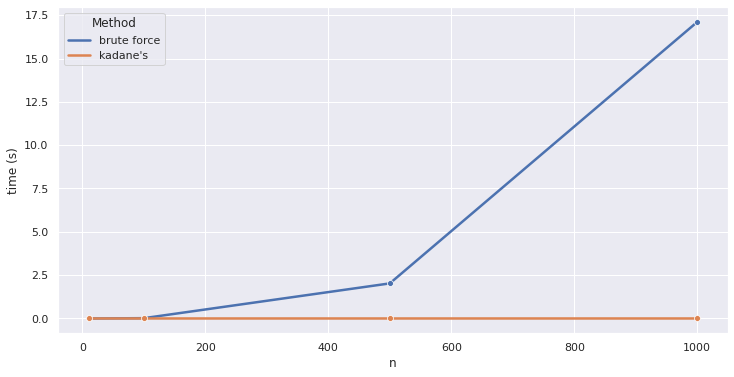

In [4]:
range = len(n_size)*2
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid"); sns.set_context("notebook", rc={"lines.linewidth": 2.5})
sns.lineplot(data=m_time[:range], x='n', y='Time', hue='Method', marker="o", palette="deep", ci=None)
plt.ylabel("time (s)")